In [1]:
from google.colab import files
uploaded = files.upload()


Saving Weather data.zip to Weather data.zip


In [4]:
import pandas as pd
import zipfile

path = "/content/"

# Unzip the uploaded file
zip_file_path = path + "Weather data.zip"
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(path)

temp = pd.read_csv(path+"temperature.csv")
hum = pd.read_csv(path+"humidity.csv")
pres = pd.read_csv(path+"pressure.csv")
wind_spd = pd.read_csv(path+"wind_speed.csv")
wind_dir = pd.read_csv(path+"wind_direction.csv")
desc = pd.read_csv(path+"weather_description.csv")
city_attr = pd.read_csv(path+"city_attributes.csv")

In [5]:
for df in [temp, hum, pres, wind_spd, wind_dir, desc]:
    df['datetime'] = pd.to_datetime(df['datetime'])


In [6]:
merged = temp.merge(hum, on="datetime", suffixes=("_temp", "_hum"))
merged = merged.merge(pres, on="datetime", suffixes=("", "_pres"))
merged = merged.merge(wind_spd, on="datetime", suffixes=("", "_windspd"))
merged = merged.merge(wind_dir, on="datetime", suffixes=("", "_winddir"))
merged = merged.merge(desc, on="datetime", suffixes=("", "_desc"))

merged.head()


,datetime,Vancouver_temp,Portland_temp,San Francisco_temp,Seattle_temp,Los Angeles_temp,San Diego_temp,Las Vegas_temp,Phoenix_temp,Albuquerque_temp,...,Philadelphia_desc,New York_desc,Montreal_desc,Boston_desc,Beersheba_desc,Tel Aviv District_desc,Eilat_desc,Haifa_desc,Nahariyya_desc,Jerusalem_desc
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,haze,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,broken clouds,few clouds,overcast clouds,sky is clear,sky is clear,sky is clear,haze,sky is clear,sky is clear,sky is clear
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,broken clouds,few clouds,sky is clear,few clouds,sky is clear,sky is clear,broken clouds,overcast clouds,sky is clear,overcast clouds
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds


In [7]:
merged["year"] = merged["datetime"].dt.year
merged["month"] = merged["datetime"].dt.month_name()
merged["hour"] = merged["datetime"].dt.hour


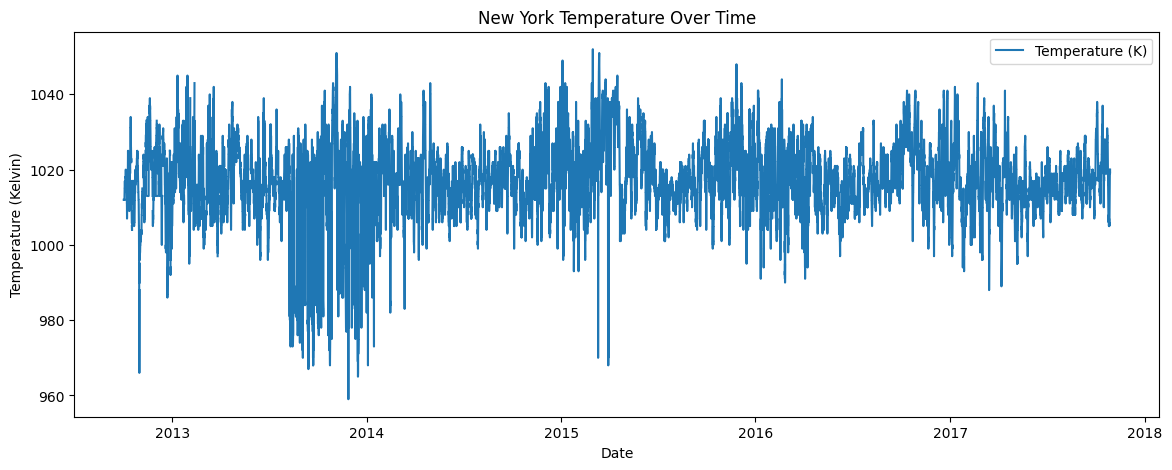

In [8]:
#Temperature Trend for One City (Example: New York)#
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(merged["datetime"], merged["New York"], label="Temperature (K)")
plt.title("New York Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (Kelvin)")
plt.legend()
plt.show()


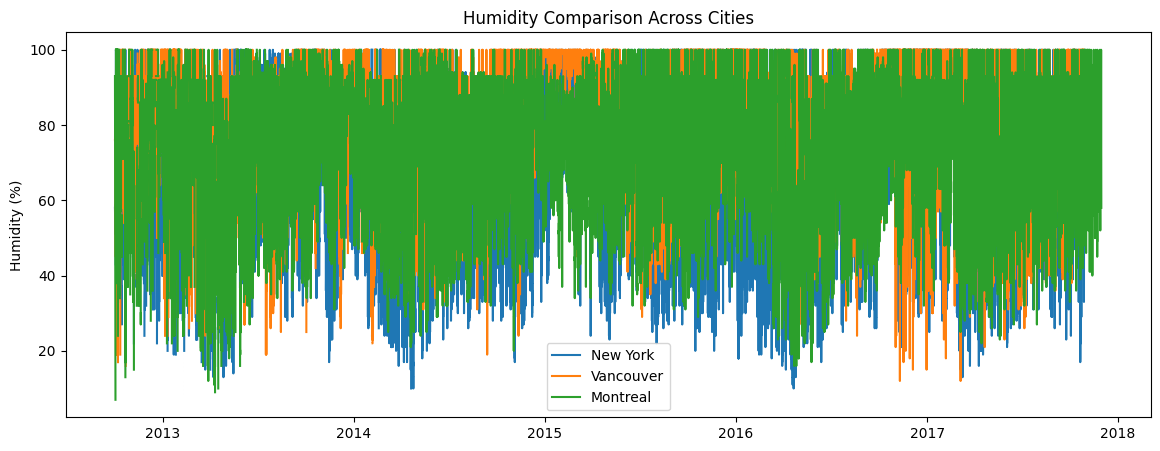

In [12]:
#Humidity Trend Comparison Between 3 Cities
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(merged["datetime"], merged["New York_hum"], label="New York")
plt.plot(merged["datetime"], merged["Vancouver_hum"], label="Vancouver")
plt.plot(merged["datetime"], merged["Montreal_hum"], label="Montreal")
plt.title("Humidity Comparison Across Cities")
plt.ylabel("Humidity (%)")
plt.legend()
plt.show()

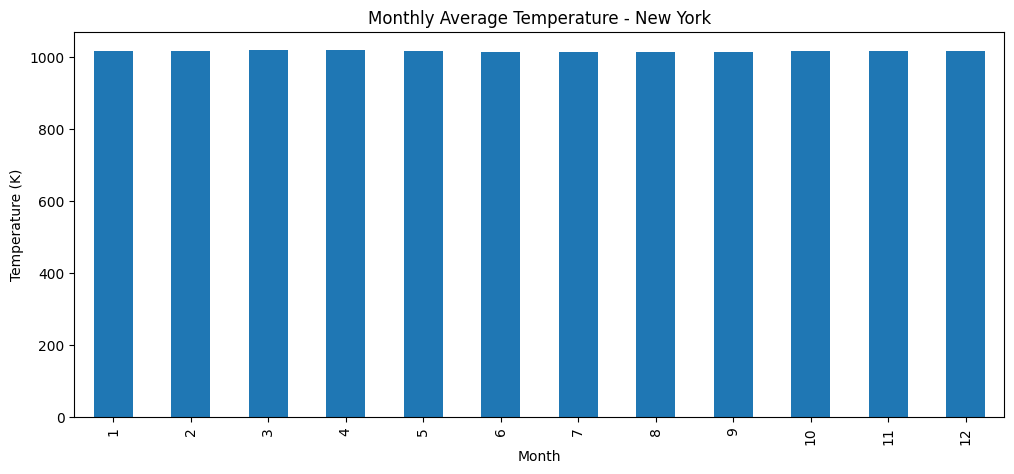

In [13]:
#Monthly Average Temperature
merged["month_num"] = merged["datetime"].dt.month

monthly_avg = merged.groupby("month_num")["New York"].mean()

monthly_avg.plot(kind='bar', figsize=(12,5))
plt.title("Monthly Average Temperature - New York")
plt.xlabel("Month")
plt.ylabel("Temperature (K)")
plt.show()


In [14]:
#weather frequency
desc_cols = [col for col in merged.columns if "_desc" in col]
merged[desc_cols].mode().iloc[0]


,0
Vancouver_desc,sky is clear
Portland_desc,sky is clear
San Francisco_desc,sky is clear
Seattle_desc,sky is clear
Los Angeles_desc,sky is clear
San Diego_desc,sky is clear
Las Vegas_desc,sky is clear
Phoenix_desc,sky is clear
Albuquerque_desc,sky is clear
Denver_desc,sky is clear


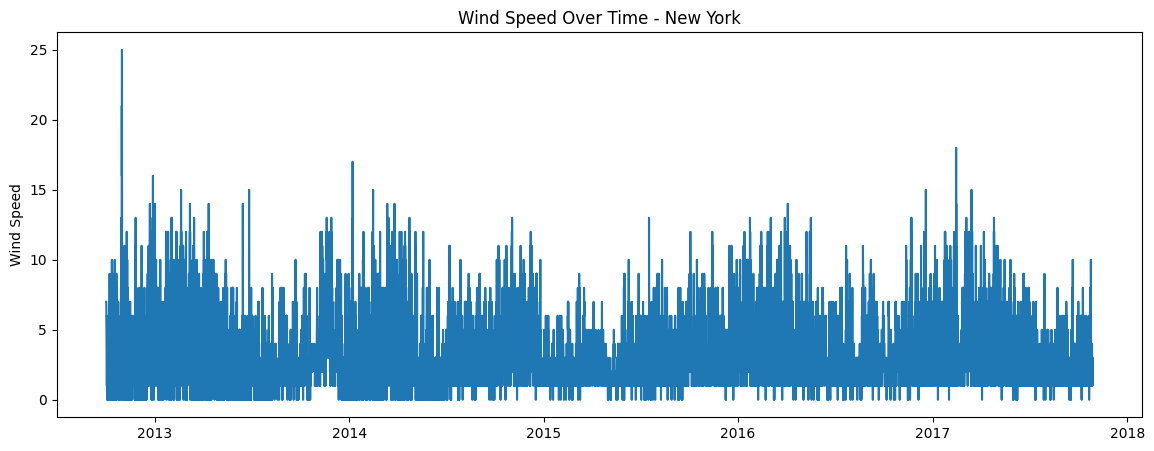

In [15]:
#wind speed
plt.figure(figsize=(14,5))
plt.plot(merged["datetime"], merged["New York_windspd"])
plt.title("Wind Speed Over Time - New York")
plt.ylabel("Wind Speed")
plt.show()


In [16]:
merged.to_csv("weather_final.csv", index=False)

from google.colab import files
files.download("weather_final.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>